In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def loadResult(filePath):
    return pd.read_csv(filePath,
                        header=None,
                        skiprows=1,
                        names=['idExecution','totalRepeats','totalFolds','executionNumber','currentRepeatNumber', 'currentFoldNumber',
                               'databaseName','distanceMethod','elipsedTrainingTime','elipsedPredicate1Time','elipsedPredicate2Time',
                               'errorPredicate1', 'errorPredicate2'
                               ])


#creating an empty dataframe
dfResults = pd.DataFrame(columns=['idExecution','totalRepeats','totalFolds','executionNumber','currentRepeatNumber', 'currentFoldNumber',
                                  'databaseName','distanceMethod','elipsedTrainingTime','elipsedPredicate1Time','elipsedPredicate2Time',
                                  'errorPredicate1', 'errorPredicate2'])

#appending results
# dfResults = pd.concat([dfResults, loadResult('~/saida1.txt')], ignore_index=True)
# dfResults = pd.concat([dfResults, loadResult('~/saida2.txt')], ignore_index=True)
# dfResults = pd.concat([dfResults, loadResult('~/saida3.txt')], ignore_index=True)
# dfResults = pd.concat([dfResults, loadResult('~/saida4.txt')], ignore_index=True)
# dfResults = pd.concat([dfResults, loadResult('~/saida5.txt')], ignore_index=True)
# dfResults = pd.concat([dfResults, loadResult('~/saida6.txt')], ignore_index=True)
# dfResults = pd.concat([dfResults, loadResult('~/saida7.txt')], ignore_index=True)
# dfResults = pd.concat([dfResults, loadResult('~/saida8.txt')], ignore_index=True)
# dfResults = pd.concat([dfResults, loadResult('~/saida9.txt')], ignore_index=True)
dfResults = pd.concat([dfResults, loadResult('~/saida16.txt')], ignore_index=True)
dfResults = pd.concat([dfResults, loadResult('~/saida17.txt')], ignore_index=True)
dfResults = pd.concat([dfResults, loadResult('~/saida18.txt')], ignore_index=True)

#creating accuracy columns
dfResults["accuracyPredicate1"] = (1 - dfResults["errorPredicate1"])
dfResults["accuracyPredicate2"] = (1 - dfResults["errorPredicate2"])

dfResults

,idExecution,totalRepeats,totalFolds,executionNumber,currentRepeatNumber,currentFoldNumber,databaseName,distanceMethod,elipsedTrainingTime,elipsedPredicate1Time,elipsedPredicate2Time,errorPredicate1,errorPredicate2,accuracyPredicate1,accuracyPredicate2
0,15,30,10,0,0,0,ElectricalFaultDetection,1,2.824345,0.003140,0.358204,0.005828,0.007494,0.994172,0.992506
1,15,30,10,1,0,1,ElectricalFaultDetection,1,3.187138,0.001279,0.385843,0.009167,0.006667,0.990833,0.993333
2,15,30,10,2,0,2,ElectricalFaultDetection,1,3.006325,0.001229,0.384494,0.005833,0.007500,0.994167,0.992500
3,15,30,10,3,0,3,ElectricalFaultDetection,1,3.384551,0.001284,0.440795,0.010833,0.001667,0.989167,0.998333
4,15,30,10,4,0,4,ElectricalFaultDetection,1,3.267964,0.001214,0.434126,0.005833,0.007500,0.994167,0.992500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,17,30,10,295,29,5,ElectricalFaultDetection,4,7.990024,0.001865,0.467517,0.009167,0.008333,0.990833,0.991667
896,17,30,10,296,29,6,ElectricalFaultDetection,4,8.951528,0.002022,0.488452,0.007500,0.009167,0.992500,0.990833
897,17,30,10,297,29,7,ElectricalFaultDetection,4,7.411022,0.001066,0.448344,0.005833,0.001667,0.994167,0.998333
898,17,30,10,298,29,8,ElectricalFaultDetection,4,8.271936,0.001107,0.451627,0.006667,0.004167,0.993333,0.995833


In [2]:
dfStatistics = dfResults.describe()

dfStatistics

,elipsedTrainingTime,elipsedPredicate1Time,elipsedPredicate2Time,errorPredicate1,errorPredicate2,accuracyPredicate1,accuracyPredicate2
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,4.427009,0.001200,0.418225,0.008042,0.006403,0.991958,0.993597
std,2.401383,0.000279,0.035499,0.003954,0.003156,0.003954,0.003156
min,1.632599,0.000906,0.305221,0.000000,0.000833,0.973333,0.976667
25%,2.477016,0.001062,0.394016,0.005000,0.004167,0.990000,0.992500
50%,3.269038,0.001109,0.420217,0.007500,0.005833,0.992500,0.994167
75%,7.186185,0.001235,0.442534,0.010000,0.007500,0.995000,0.995833
max,9.834969,0.003140,0.525116,0.026667,0.023333,1.000000,0.999167


In [3]:
generalStats = dfResults.groupby(['distanceMethod','currentRepeatNumber']).agg(
                                                                        elipsedTrainingTime=('elipsedTrainingTime','sum'),
                                                                        elipsedPredict1Time=('elipsedPredicate1Time','sum'),
                                                                        elipsedPredict2Time=('elipsedPredicate2Time','sum'),
                                                                        accuracyPredict1=('accuracyPredicate1','mean'),
                                                                        accuracyPredict2=('accuracyPredicate2','mean')
                                                                        )

generalStats

elipsedTrainingTime  elipsedPredict1Time  \
distanceMethod currentRepeatNumber                                             
1              0                              31.543369             0.014336   
               1                              33.563169             0.013345   
               2                              33.058231             0.013418   
               3                              33.133471             0.014747   
               4                              33.302984             0.012739   
...                                                 ...                  ...   
4              25                             76.009443             0.010818   
               26                             74.437435             0.011729   
               27                             79.367987             0.010843   
               28                             72.036594             0.010900   
               29                             79.980493             0.013259   

                                    elipsedPredict2Time  accuracyPredict1  \
distanceMethod currentRepeatNumber                                          
1              0                               4.033777          0.992000   
               1                               4.202396          0.991001   
               2                               4.092708          0.993167   
               3                               4.196764          0.992668   
               4                               4.193146          0.991584   
...                                                 ...               ...   
4              25                              4.255795          0.991417   
               26                              4.197666          0.992167   
               27                              4.365717          0.993251   
               28                              4.045611          0.992251   
               29                              4.441010          0.992667   

                                    accuracyPredict2  
distanceMethod currentRepeatNumber                    
1              0                            0.994751  
               1                            0.992668  
               2                            0.993251  
               3                            0.994084  
               4                            0.994167  
...                                              ...  
4              25                           0.993000  
               26                           0.994250  
               27                           0.994167  
               28                           0.994084  
               29                           0.993834  

[90 rows x 5 columns]

In [8]:
summary = dfResults.groupby(['distanceMethod']).agg(
                                                    elipsedTrainingTime=('elipsedTrainingTime','sum'),
                                                    elipsedPredict1Time=('elipsedPredicate1Time','sum'),
                                                    elipsedPredict2Time=('elipsedPredicate2Time','sum'),
                                                    accuracyPredict1=('accuracyPredicate1','mean'),
                                                    accuracyPredict2=('accuracyPredicate2','mean'),
                                                    stdPredict1=('accuracyPredicate1','std'),
                                                    stdPredict2=('accuracyPredicate2','std')
                                                    )

summary

,elipsedTrainingTime,elipsedPredict1Time,elipsedPredict2Time,accuracyPredict1,accuracyPredict2,stdPredict1,stdPredict2
distanceMethod,,,,,,,
1,975.904225,0.399054,124.820671,0.991734,0.993531,0.003937,0.003343
3,698.096690,0.326185,123.424390,0.992134,0.993592,0.003910,0.003191
4,2310.307568,0.355195,128.157858,0.992006,0.993667,0.004017,0.002931


In [5]:

dfElipsedTimeStatistic = dfResults[(dfResults['distanceMethod'] == 1)].groupby(['currentRepeatNumber']).agg(elipsedTrainingTime1=('elipsedTrainingTime','sum'))
serieElipsedTimeStatistic3 = dfResults[(dfResults['distanceMethod'] == 3)].groupby(['currentRepeatNumber']).agg(elipsedTrainingTime3=('elipsedTrainingTime','sum'))['elipsedTrainingTime3']
serieElipsedTimeStatistic4 = dfResults[(dfResults['distanceMethod'] == 4)].groupby(['currentRepeatNumber']).agg(elipsedTrainingTime4=('elipsedTrainingTime','sum'))['elipsedTrainingTime4']
dfElipsedTimeStatistic['elipsedTrainingTime3'] = serieElipsedTimeStatistic3
dfElipsedTimeStatistic['elipsedTrainingTime4'] = serieElipsedTimeStatistic4


dfElipsedTimeStatistic

,elipsedTrainingTime1,elipsedTrainingTime3,elipsedTrainingTime4
currentRepeatNumber,,,
0,31.543369,22.381379,74.575262
1,33.563169,24.065276,78.864772
2,33.058231,23.574151,83.542237
3,33.133471,22.490821,72.959428
4,33.302984,23.783468,78.159368
5,33.165694,23.969038,81.727486
6,33.013721,22.968855,76.020611
7,33.084151,22.785627,78.396672
8,30.483916,22.175409,76.364598


In [6]:
dfElipsedTimeStatistic.describe()

,elipsedTrainingTime1,elipsedTrainingTime3,elipsedTrainingTime4
count,30.000000,30.000000,30.000000
mean,32.530141,23.269890,77.010252
std,0.964817,0.650430,2.927715
min,30.483916,21.985850,72.036594
25%,31.882588,22.811852,74.784663
50%,32.501090,23.343061,76.248406
75%,33.121141,23.794967,78.507646
max,34.724636,24.467256,84.821836


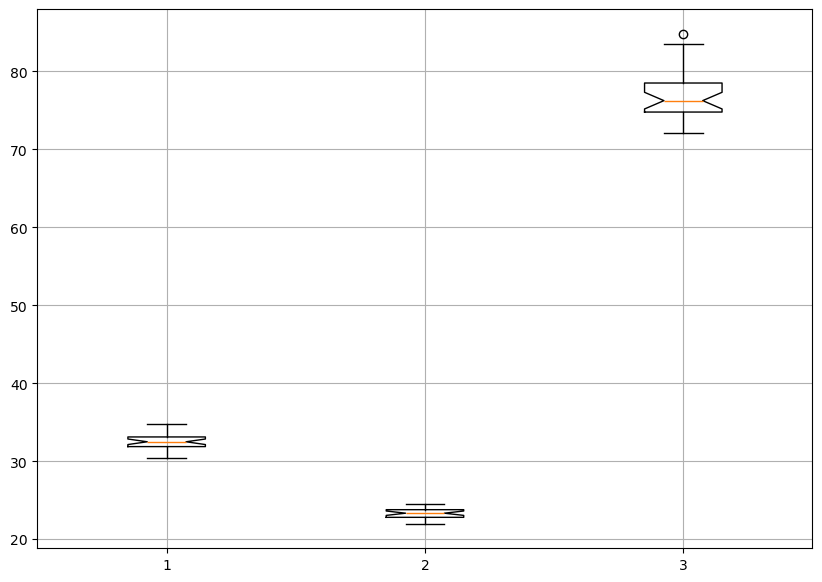

In [7]:
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(dfElipsedTimeStatistic.values, notch=True)

plt.grid()

# show plot
plt.show()